In [1]:
from preamble import *
from LocalDatasets import read_did_pred,read_did_preds,read_did_predSummary,saveDict,readDict,ScoresFromPredictions
plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figuresope
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 
import seaborn as sns

In [2]:
list_of_datasets = []
func = 'cvScoreNoise5'
clfName = 'RandomForestClassifier'
amount = 3
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\' + func + '\\' + clfName + '\\' + str(amount) + '\\'
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        list_of_datasets.append(int(dirname))


In [3]:
import csv,ast
newpath = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\did\\'
with open(newpath + str(1043) + '.csv', 'r') as f:
    reader2 = csv.reader(f)
    your_dict = list(reader2)
new_dict = []
for i in your_dict:
    if not i == []:
        new_dict.append([])
        for j in i:
            new_dict[len(new_dict)-1].append(ast.literal_eval(j))
new_dict = new_dict[0][0]    

In [4]:
scores = {}
name = 'scores'
for i in list_of_datasets:
    scores[i] = read_did_pred(func,clfName,amount,i,name)

In [1]:
legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
MaxClass = []
j = 0
for i in legend_X:
    score1.append(sum(scores[i][0])/len(scores[i][0]))
    score2.append(sum(scores[i][1])/len(scores[i][1]))
    score3.append(sum(scores[i][2])/len(scores[i][2]))
    score4.append(sum(scores[i][3])/len(scores[i][3]))
    j = j + 1
    MaxClass.append(readDict(i)['MajorityClassSize']/readDict(i)['NumberOfInstances'])


NameError: name 'scores' is not defined

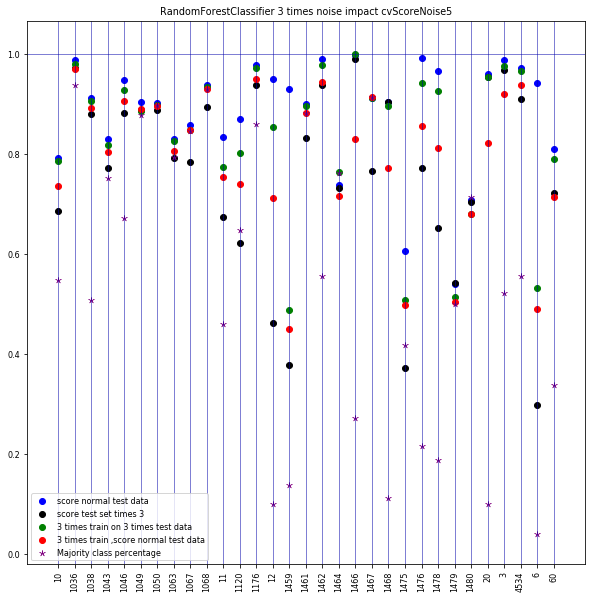

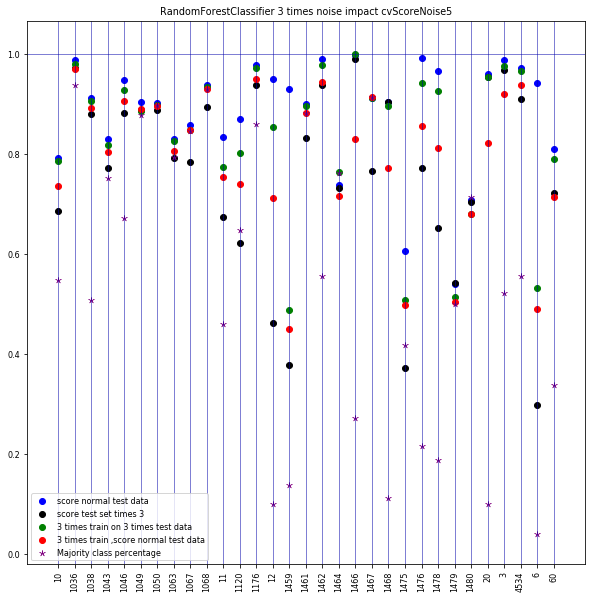

In [13]:
x_axis = range(0,len(score1))
fig, ax = plt.subplots()
_=plt.title(clfName + ' ' + str(amount) + ' times noise impact ' + func)
_=ax.scatter(x_axis, score1,color='b',label="score normal test data")
_=ax.scatter(x_axis, score2,color= 'black', label = 'score test set times ' + str(amount))
_=ax.scatter(x_axis, score3,color= 'g', label = str(amount) + ' times train on '+ str(amount) + ' times test data')
_=ax.scatter(x_axis, score4,color= 'red', label = str(amount) + ' times train ,score normal test data')
_=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,legend_X ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.axhline(y=1)
for i in x_axis:
    _=ax.axvline(x=i)
_=ax.legend()
plt.show()

## comparing different noise levels

In [2]:
list_of_datasets = []
listFunc = ['cvScoreNoise2','cvScoreNoise3']
clfName = 'SGDClassifier'
# listAmount = [-10,-8,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,8,10]
listAmount = [-10,-9,-8-2,-1,1,2,3]
did = 18
scores = []
name = 'scores'
count = []
# for j in amountList:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append(str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
listAmount = [-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
listAmount = [0.6,0.8,1.5,2]
for j in listAmount:        
    scores.append(read_did_pred('cvScoreNoise3',clfName,j,did,name))
    count.append(str(j*100))

# for j in listAmount:    
#     scores.append(read_did_pred('cvScoreNoise4',clfName,j,did,name))
#     count.append('cvScoreNoise4' + ',' + str(j))
# for j in listAmount:
#     scores.append(read_did_pred('cvScoreNoise5',clfName,j,did,name))
#     count.append('cvScoreNoise5' + ',' + str(j))
# func = 'cvScoreNoise4'
# for amount in listAmount:
#     scores.append(ScoresFromPredictions(func,clfName,amount,did,'kappa'))
#     count.append(func + ',' + str(amount))


In [3]:
legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
MaxClass = []
j = 0
for i in range(0,len(scores)):
    score1.append(sum(scores[i][0])/len(scores[i][0]))
    score2.append(sum(scores[i][1])/len(scores[i][1]))
    score3.append(sum(scores[i][2])/len(scores[i][2]))
    score4.append(sum(scores[i][3])/len(scores[i][3]))
    j = j + 1
    MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])

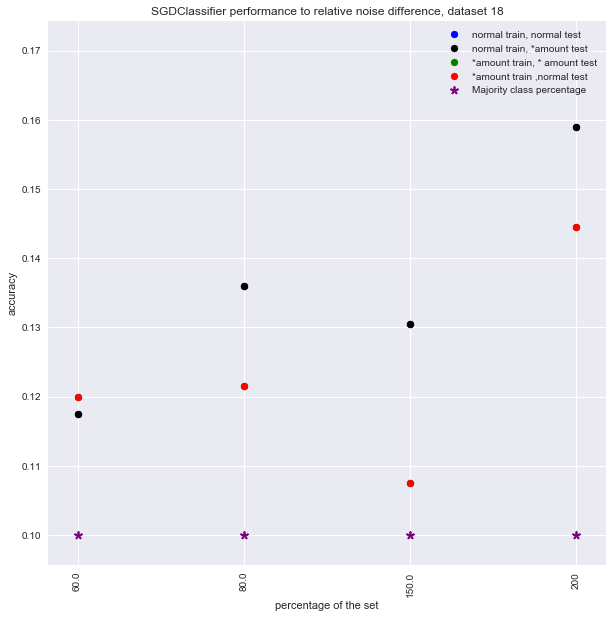

In [4]:
x_axis = range(0,len(score1))
fig, ax = plt.subplots()
_=plt.title(clfName +   ' performance to relative noise difference, dataset ' + str(did))
_=ax.scatter(x_axis, score1,color='b',label="normal train, normal test")
_=ax.scatter(x_axis, score2,color= 'black', label = 'normal train, *amount test')
_=ax.scatter(x_axis, score3,color= 'g', label = '*amount train, * amount test')
_=ax.scatter(x_axis, score4,color= 'red', label = '*amount train ,normal test')
_=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('accuracy')
_=plt.xlabel('percentage of the set')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [36]:
score2[len(score4)-1]
score4[len(score4)-1]

0.954

0.7865

## working with the summary predictions

In [104]:
predict = {}
func = 'cvScoreNoise3'
clfName = 'KneighborClassifier'
amount = 2
name = 'SummaryGuesses'
# for i in list_of_datasets:
#     predict[i] = read_did_predSummary(func,clfName,amount,i,name)

In [108]:
from Noise2 import values_target,distr_guessed
from LocalDatasets import read_did
did = 182
predict = read_did_predSummary(func,clfName,amount,did,name)
X,y = read_did(did)
set1 = values_target(y)
preds = [{},{},{},{}]
for i in preds:
    for j in set1:
        i[str(j)] = []
    
for i in range(0,len(predict)):
    for k in predict[i]:
        for j in set1:
            if k.get(str(j)) == None:
                preds[i][str(j)].append(0)
            else:
                preds[i][str(j)].append(k[str(j)])
cv = 10        
distr = distr_guessed(y[len(y)-len(y)//cv:len(y)])

# distr_plot = {}
# for i in set1:
#     distr_plot[i] = []
# for i in range(0,len(predict[0])):
#     for j in set1:
#         distr_plot[j].append(distr[j])

KeyError: '0.0'

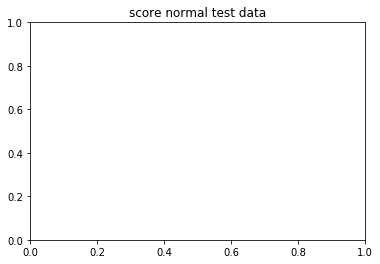

In [109]:
fig, ax = plt.subplots()
_=plt.title('score normal test data')

_=ax.scatter(range(0,len(preds[0]['0.0'])), preds[0]['0.0'],color='r',label="class 0.0")
_=ax.axhline(y=distr['0.0'],color = 'r')
_=ax.scatter(range(0,len(preds[0]['1.0'])), preds[0]['1.0'],color='b',label="class 1.0")
_=ax.axhline(y=distr['1.0'],color = 'b',label = 'average')
_=ax.legend()
fig2, ax2 = plt.subplots()
_=plt.title('score +2 test data')
_=ax2.scatter(range(0,len(preds[1]['0.0'])), preds[1]['0.0'],color='r',label="class 0.0")
_=ax2.scatter(range(0,len(preds[1]['1.0'])), preds[1]['1.0'],color='b',label="class 1.0")
_=ax2.legend()

## Looking at strange results, great difference in prediction accuracy

In [112]:
listWeird = []
scoreC2 = []
scoreC4 = []
legendC_X = []
for i in range(0,len(score1)):
    if score4[i] > score2[i] + 0.1:
        scoreC2.append(score2[i])
        scoreC4.append(score4[i])
#         legendC_X.append(legend_X[i])
#         readDict(legend_X[i]).get('NumberOfNumericFeatures')/readDict(legend_X[i]).get('NumberOfFeatures')

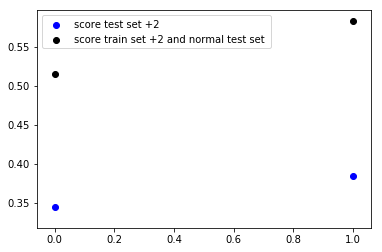

In [113]:
x_axis = range(0,len(scoreC2))
fig, ax = plt.subplots()
# _=plt.title('RandomForestClassifier')
_=ax.scatter(x_axis, scoreC2,color='b',label="score test set +2")
_=ax.scatter(x_axis, scoreC4,color= 'black', label = 'score train set +2 and normal test set ')
# _=plt.xticks(x_axis,legendC_X ,rotation='vertical')
_=ax.legend()

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from LocalDatasets import read_did
failScores1 = []
for i in listFail1:
    X,y = read_did(i)
    clf = RandomForestClassifier()
    failScores1.append(cross_val_score(clf, X, y, cv=10, n_jobs = -1, scoring="accuracy").mean())

In [29]:
failScores1
for i in range(0,len(score1)):
    if MaxClass[i] > score1[i]:
        print(MaxClass[i])
        print(score1[i],'score')

[0.8988975992160706,
 0.68061261261261263,
 0.91115558096690175,
 0.69950423985152821]

0.8976327575175944
0.8923076923076924 score
0.7620320855614974
0.7297297297297297 score
0.9148148148148149
0.9055555555555556 score
0.7135506003430532
0.710344827586207 score


In [20]:
import os
func = 'cvScoreNoise2'
clfName = 'RandomForestClassifier'
amount = 100
did = 3515
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\' + func + '\\' + clfName + '\\' + str(amount) + '\\' + str(did)
print(os.path.isdir(path))

False


In [56]:
listDifferent = []
for i in range(0,len(score1)):
    if score2[i] < score4[i]:
        listDifferent.append(legend_X[i])
        print(score4[i]-score2[i])

0.2634468380820014
0.043352601156069426
0.0590733590733592
0.00322580645161287
0.009499999999999995
0.0682664054848188
0.35036496350364954
0.01891891891891906
0.8462264150943396
0.007294832826747644


In [35]:
stdList = []
c = 0
for i in scores:
    stdList.append([])
    for j in range(0,4):
        stdList[c].append(np.array(scores[i][j]).std())
    c = c + 1
np.array(scores[10][0]).std()
np.array(scores[10][1]).std()
np.array(scores[10][2]).std()
np.array(scores[10][3]).std()

0.1171515676204052

0.12955969390869324

0.081127262082861057

0.084515425472851652

In [38]:
total = [0,0,0,0]
for i in stdList:
    for j in range(0,4):
        total[j] = total[j] + i[j]
    

In [125]:
did = 60
summary = []
clfName = 'RandomForestClassifier'
name = 'SummaryGuesses'
count = []
# for j in listAmount:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append('cvScoreNoise2' + ',' + str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
listAmount = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]

for j in listAmount:        
    summary.append(read_did_predSummary('cvScoreNoise3',clfName,amount,did,name))
    
    count.append('cvScoreNoise3' + ',' + str(j))

In [239]:
did = 60
predictions = []
clfName = 'RandomForestClassifier'
name = 'Predictions'
count = []
# for j in listAmount:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append('cvScoreNoise2' + ',' + str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
listAmount = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
amount = 3
for did in list_of_datasets:        
    predictions.append(read_did_preds('cvScoreNoise5',clfName,amount,did,name))

In [244]:
# correct = 0
# predict1_is0 = 0
# predict1_is2 = 0
pred = []
classes = []
for did in list_of_datasets:
    classes.append(readDict(did)['NumberOfClasses'])
# classes = readDict(did)['NumberOfClasses']
for y in range(0,4):
    pred.append([])
    for k in range(0,len(predictions)):
        pred[y].append([])
        for i in range(0,classes[k]):
            pred[y][k].append([])
            for j in range(0,classes[k]):
                pred[y][k][i].append(0)
# predict
on10 = 0
for y in range(0,4):
    for j in range(0,len(predictions)):
        for on10 in range(0,10):
            for i in range(0,len(predictions[0][0][on10 ])):
                pred[y][j][predictions[j][4][on10][i]][predictions[j][y][on10][i]] = pred[y][j][predictions[j][4][on10][i]][predictions[j][y][on10][i]] + 1


In [245]:
scur = []
sc = 3
for i in range(0,len(pred[sc])):
    scur.append(0)
for i in range(0,len(pred[sc])):
    for j in range(0,len(pred[sc][0])):
        scur[i] = scur[i] + pred[sc][i][j][j]
        

IndexError: list index out of range

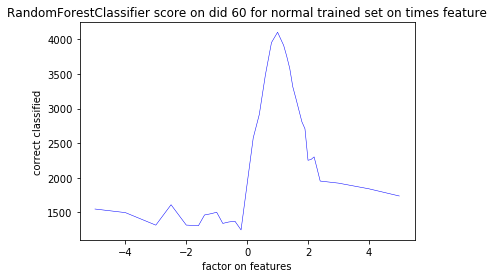

In [115]:
fig, ax = plt.subplots()
_=plt.title('RandomForestClassifier score on did 60 for normal trained set on times feature')
_=ax.scatter(listAmount[4:len(listAmount)-5], scur[4:len(listAmount)-5],color='b',label="score test set +2")
_=plt.ylabel('correct classified')
_=plt.xlabel('factor on features')

## Feature reduction(scalability)

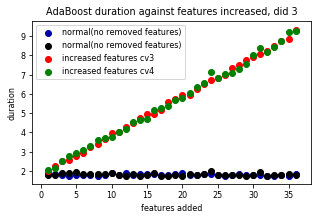

In [52]:
from LocalDatasets import read_duration,readDict
did = 3
features = readDict(did)['NumberOfFeatures']
func = 'cvScoreFeatures3'
func2 = 'cvScoreFeatures4'
clfName = 'AdaBoost'
dur1 = []
dur2 = []
dur3 = []
dur4 = []
type = 0
for amount in range(1,features):
    dur1.append(read_duration(func,clfName,did,amount)[type])
    dur2.append(read_duration(func,clfName,did,amount)[type+2])
    dur3.append(read_duration(func2,clfName,did,amount)[type])
    dur4.append(read_duration(func2,clfName,did,amount)[type+2])
_=plt.scatter(range(1,features),dur1, label = 'normal(no removed features)')
_=plt.scatter(range(1,features),dur3, label = 'normal(no removed features)',color = 'black')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.scatter(range(1,features),dur2,color = 'r',label = 'increased features cv3')
    _=plt.scatter(range(1,features),dur4,color = 'g',label = 'increased features cv4')
else:
    _=plt.scatter(range(1,features),dur2,color = 'r',label = 'reduced features')
if func == 'cvScoreFeatures3' or func == 'cvScoreFeatures4':
    _=plt.title(clfName + ' duration against features increased, did ' + str(did))
else:
    _=plt.title(clfName + ' duration against features removed, did' + str(did))
_=plt.ylabel('duration')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.xlabel('features added')
else:
    _=plt.xlabel('features removed')
# _=plt.yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

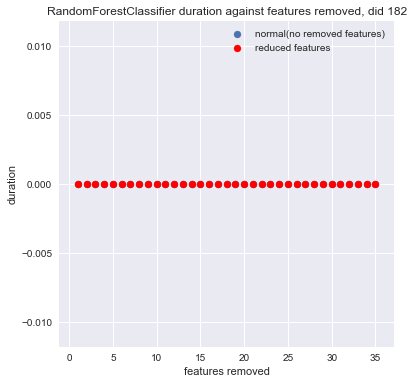

In [67]:
from LocalDatasets import read_duration,readDict
did = 182
features = readDict(did)['NumberOfFeatures']
func = 'TestMissing'
clfName = 'RandomForestClassifier'
dur1 = []
dur2 = []
dur3 = []
dur4 = []
type = 1
ranges = range(1,features-1)
for amount in ranges:
    dur1.append(read_duration(func,clfName,did,amount)[type])
    dur2.append(read_duration(func,clfName,did,amount)[type+2])
_=plt.scatter(ranges,dur1, label = 'normal(no removed features)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.scatter(ranges,dur2,color = 'r',label = 'increased features')
else:
    _=plt.scatter(ranges,dur2,color = 'r',label = 'reduced features')
if func == 'cvScoreFeatures3' or func == 'cvScoreFeatures4':
    _=plt.title(clfName + ' duration against features increased, did ' + str(did))
else:
    _=plt.title(clfName + ' duration against features removed, did ' + str(did))
_=plt.ylabel('duration')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.xlabel('features added')
else:
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

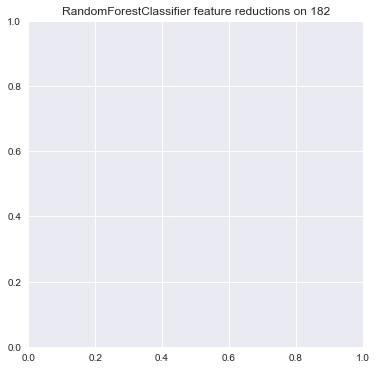

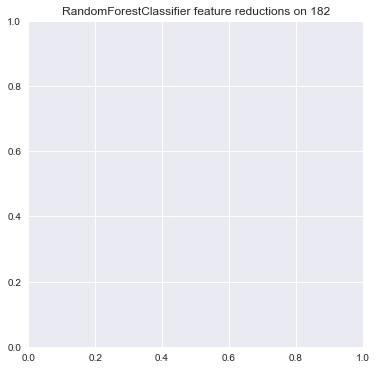

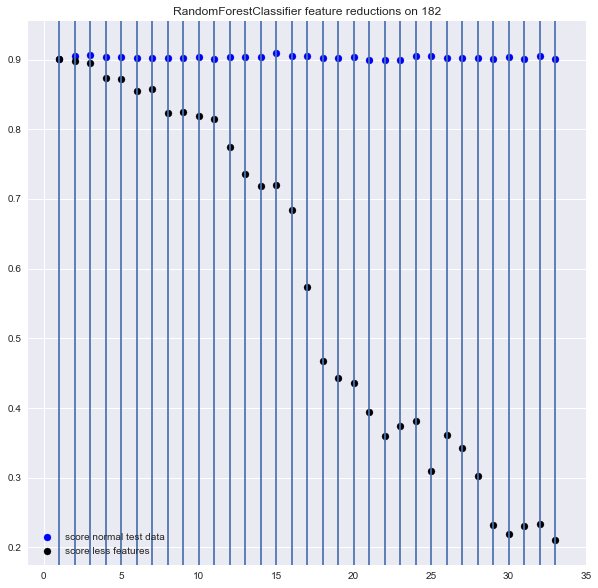

In [116]:
from LocalDatasets import readDict,read_features,readDict
did = 182
func = 'TestMissing'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(1,readDict(did)['NumberOfFeatures']-3)

clfName = 'RandomForestClassifier'

scores = []
name = 'scores'
if func == 'TestMissing':    
    for amount in legend_X:
        scores.append(read_did_pred(func,clfName,did,amount,name))
else:
    for amount in legend_X:
        scores.append(read_features(func,clfName,did,amount))

score1= []
score2 = []
MaxClass = []
j = 0
for i in legend_X:
    if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
        score1.append(scores[i-1][0])
        score2.append(scores[i-1][1])
    elif func == 'TestMissing':
        score1.append(sum(scores[i-1][0])/10)
        score2.append(sum(scores[i-1][1])/10)
    else:
        score1.append(scores[i-1][0])
        score2.append(scores[i-1][1])
    j = j + 1
#     MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])
x_axis = legend_X
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(clfName  + ' feature increase on ' + str(did))
else:
    _=plt.title(clfName  + ' feature reductions on ' + str(did))
_=ax.scatter(x_axis, score1,color='b',label="score normal test data")
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=ax.scatter(x_axis, score2,color= 'black', label = 'score' + ' more features')
else:
    _=ax.scatter(x_axis, score2,color= 'black', label = 'score' + ' less features')
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# if func == 'cvScoreFeatures3':
#     _=plt.xticks(x_axis,legend_X ,rotation='vertical')
# else:
#     _=plt.xticks(x_axis,reversed(legend_X) ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
for i in x_axis:
    _=ax.axvline(x=i)
_=ax.legend()
plt.show()

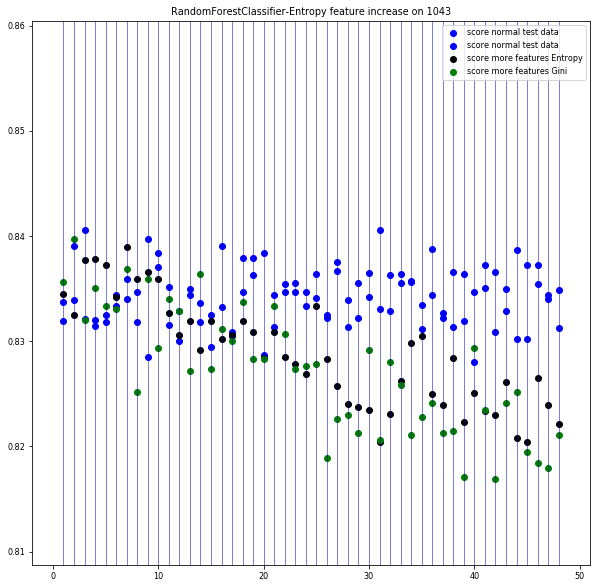

In [75]:
from LocalDatasets import readDict,read_features,readDict
did = 1043
func = 'cvScoreFeatures4'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(0,readDict(did)['NumberOfFeatures']-1)

clfName = 'RandomForestClassifier-Entropy'
clfName2 = 'RandomForestClassifier-Gini'
scores = []
scores2 = []
for amount in legend_X:
    scores.append(read_features(func,clfName,did,amount))
    scores2.append(read_features(func,clfName2,did,amount))
score1= [[],[]]
score2 = [[],[]]
MaxClass = []
j = 0
for i in legend_X:
    if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
        score1[0].append(scores[i-1][0])
        score1[1].append(scores2[i-1][0])
        score2[0].append(scores[i-1][1])
        score2[1].append(scores2[i-1][1])
    else:
        score1.append(scores[i][0])
        score2.append(scores[i][1])
    j = j + 1
#     MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])
x_axis = range(1,len(score1[0])+1)
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(clfName  + ' feature increase on ' + str(did))
else:
    _=plt.title(clfName  + ' feature reductions on ' + str(did))
_=ax.scatter(x_axis, score1[0],color='b',label="score normal test data")
_=ax.scatter(x_axis, score1[1],color='b',label="score normal test data")
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=ax.scatter(x_axis, score2[0],color= 'black', label = 'score' + ' more features Entropy')
    _=ax.scatter(x_axis, score2[1],color= 'green', label = 'score' + ' more features Gini')
else:
    _=ax.scatter(x_axis, score2,color= 'black', label = 'score' + ' less features')
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# if func == 'cvScoreFeatures3':
#     _=plt.xticks(x_axis,legend_X ,rotation='vertical')
# else:
#     _=plt.xticks(x_axis,reversed(legend_X) ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
for i in x_axis:
    _=ax.axvline(x=i)
_=ax.legend()
plt.show()

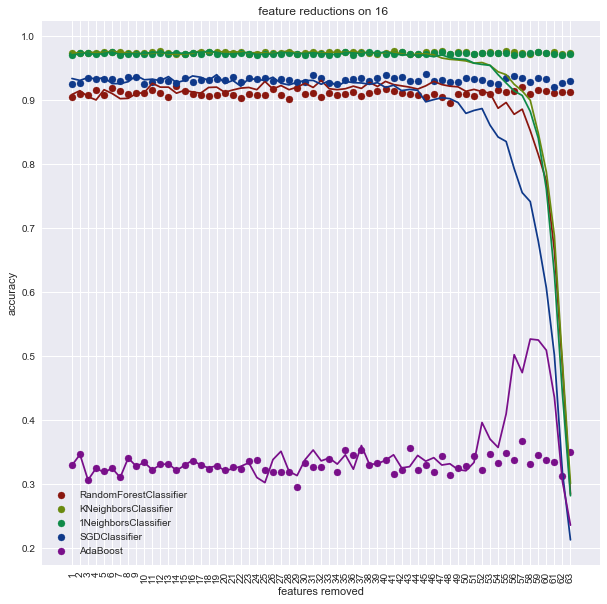

In [35]:
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf']#, 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
from LocalDatasets import readDict,read_features,readDict
did = 16
func = 'cvScoreFeatures1'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(0,readDict(did)['NumberOfFeatures'])

# clfName = 'MultinomialNB'
amount = 1
scores = []
features = readDict(did)['NumberOfFeatures']
for amount in range(1,features-1):
    scores.append([])    
    for clfName in clfNames:
        scores[amount-1].append(read_features(func,clfName,did,amount))
score1= []
score2 = []
for i in clfNames:
    score1.append([])
    score2.append([])
MaxClass = []
j = 0
for amount in range(1,features-1):
    cl = 0
    for clfName in clfNames:
        score1[cl].append(scores[amount-1][cl][0])
        score2[cl].append(scores[amount-1][cl][1])
        
        cl = cl + 1

x_axis = range(0,len(score1[0]))
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(' feature increase on ' + str(did))
else:
    _=plt.title(' feature reductions on ' + str(did))
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(score1)):
    _= ax.scatter(x_axis,score1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,score2[i], color = cl[i] )

amountList = range(1,features-1)
_=plt.xticks(x_axis,amountList ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.xlabel('features removed')
plt.ylabel('accuracy')
plt.show()


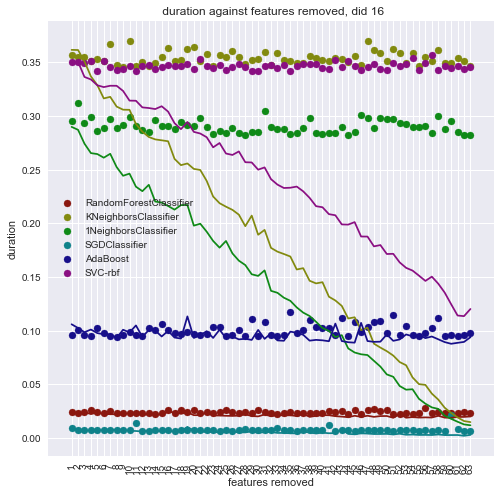

In [34]:
from LocalDatasets import read_duration,readDict

clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf']#, 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']

did = 16
features = readDict(did)['NumberOfFeatures']
func = 'cvScoreFeatures1'
# clfName = 'AdaBoost'
dur1 = []
dur2 = []
typ = 1
fig, ax = plt.subplots()
cs = 0
for clfName in clfNames:
    dur1.append([])
    dur2.append([])
    for amount in range(1,features-1):
        dur1[cs].append(read_duration(func,clfName,did,amount)[typ])
        dur2[cs].append(read_duration(func,clfName,did,amount)[typ+2])
    cs = cs+1
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
x_axis = range(0,len(dur1[0]))        
for i in range(0,len(dur1)):
    _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i] )
_=plt.xticks(x_axis,range(1,features-1) ,rotation='vertical')
_=plt.title(' duration against features removed, did ' + str(did))
_=plt.ylabel('duration')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.xlabel('features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
_=plt.legend()
_=plt.show()

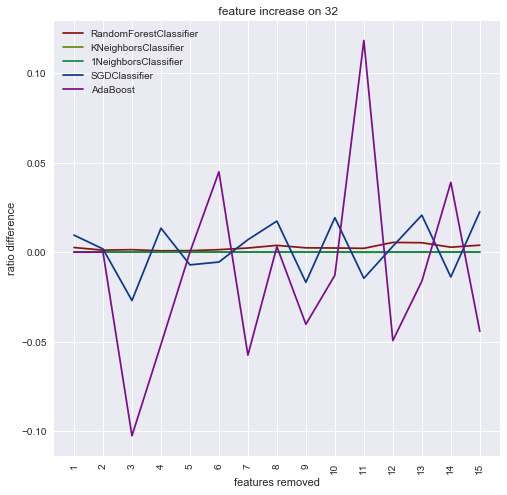

In [19]:
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf', 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
from LocalDatasets import readDict,read_features,readDict
did = 32
func = 'cvScoreFeatures3'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(0,readDict(did)['NumberOfFeatures'])

# clfName = 'MultinomialNB'
amount = 1
scores = []
features = readDict(did)['NumberOfFeatures']
for amount in range(1,features-1):
    scores.append([])    
    for clfName in clfNames:
        scores[amount-1].append(read_features(func,clfName,did,amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
#     score1.append([])
#     score2.append([])
    ratio.append([])
MaxClass = []
j = 0
for amount in range(1,features-1):
    cl = 0
    for clfName in clfNames:
#         score1[cl].append(scores[amount-1][cl][0])
#         score2[cl].append(scores[amount-1][cl][1])
        if not scores[amount-1][cl][0] == 0:
            ratio[cl].append((scores[amount-1][cl][0]-scores[amount-1][cl][1])/scores[amount-1][cl][0])
        else:
            ratio[cl].append(0)
        cl = cl + 1

x_axis = range(0,len(ratio[0]))
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(' feature increase on ' + str(did))
else:
    _=plt.title('Effect of feature reductions on ' + str(did) + ', as ratio ')
cl = sns.hls_palette(len(ratio), l=.3, s=.8)
for i in range(0,len(ratio)):
    _= ax.plot(x_axis,ratio[i], label = clfNames[i], color = cl[i] )

amountList = range(1,features-1)
_=plt.xticks(x_axis,amountList ,rotation='vertical')
fig.set_figheight(8)
fig.set_figwidth(8)
_=plt.ylabel('ratio difference')
_=plt.xlabel('features removed')
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [10]:
for clfName in clfNames:
    read_duration(func,clfName,did,amount)[type]

0.01419759162581613

0.011971899646596285

0.010518738778955594

0.0013701231064260355

0.059933205914603604

0.00680676412594039

0.004131828513891378

0.005366665375731827

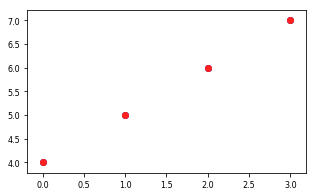

In [29]:
plt.scatter(range(0,4),range(4,8))
plt.show()

In [39]:
from LocalDatasets import read_did
from copy import deepcopy
X,y = read_did(182)
X2 = deepcopy(X_test)
X_Ttrans = list(map(list, zip(*X_test)))
amount = 5
Missings = []
for i in range(0,amount):
    Missings.append(max(X_Ttrans[i])*100)

for i in range(0,len(X2)):
    for j in range(0,amount):
        X2[i][j] = Missings[j]

-2.23433
-2.47331
-2.78089
-2.62427
-2.22327
-2.4575
-2.94709
-2.82442
-2.14633
-2.44478
-2.93649
-2.8127
-2.22674
-2.47164
-2.95846
-2.83356
-2.14555
-2.45234
-2.93999
-2.81596
-2.21702
-2.44101
-2.92593
-2.80369
-2.221
-2.47222
-2.96251
-2.82554
-2.21928
-2.45744
-2.94007
-2.81553
-2.21821
-2.44813
-2.93049
-2.80805


In [65]:
readDict(3)

{'MajorityClassSize': 1669,
 'MaxNominalAttDistinctValues': 3,
 'MinorityClassSize': 1527,
 'NumberOfClasses': 2,
 'NumberOfFeatures': 37,
 'NumberOfInstances': 3196,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 0,
 'NumberOfSymbolicFeatures': 37,
 'did': 3,
 'format': 'ARFF',
 'name': 'kr-vs-kp',
 'status': 'active'}

In [5]:
len(range(1,features-1))

6

In [18]:
import seaborn as sns
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

In [19]:
gl = sns.hls_palette(8, l=.3, s=.8)

In [21]:
gl[0]

(0.54, 0.088799999999999948, 0.05999999999999994)

In [16]:
sum(ratio[3])
tu = np.array(ratio[3])
tu.std()

-0.16381003875809316

0.19813509860203743

In [74]:
scores

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [49]:
len(clfNames)

8

In [73]:
func
clfName
did
amount = 34
read_features(func,clfName,did,amount)

'TestMissing'

'RandomForestClassifier'

182

[0, 0]

In [96]:
scores[32]

[[0.888024883359,
  0.902021772939,
  0.889580093313,
  0.889580093313,
  0.926905132193,
  0.926905132193,
  0.905132192846,
  0.905132192846,
  0.883359253499,
  0.897356143079],
 [0.181959564541,
  0.209953343701,
  0.189735614308,
  0.195956454121,
  0.225505443235,
  0.203732503888,
  0.211508553655,
  0.228615863142,
  0.241057542768,
  0.220839813375]]

In [115]:
score1

[[0.895800933126,
  0.906687402799,
  0.897356143079,
  0.898911353033,
  0.898911353033,
  0.909797822706,
  0.900466562986,
  0.891135303266,
  0.916018662519,
  0.892690513219],
 [0.911353032659,
  0.909797822706,
  0.906687402799,
  0.900466562986,
  0.917573872473,
  0.923794712286,
  0.905132192846,
  0.897356143079,
  0.897356143079,
  0.888024883359],
 [0.920684292379,
  0.898911353033,
  0.905132192846,
  0.898911353033,
  0.9300155521,
  0.884914463453,
  0.922239502333,
  0.888024883359,
  0.905132192846,
  0.912908242613],
 [0.892690513219,
  0.902021772939,
  0.905132192846,
  0.886469673406,
  0.889580093313,
  0.909797822706,
  0.911353032659,
  0.903576982893,
  0.916018662519,
  0.914463452566],
 [0.903576982893,
  0.920684292379,
  0.914463452566,
  0.909797822706,
  0.880248833593,
  0.883359253499,
  0.902021772939,
  0.906687402799,
  0.914463452566,
  0.897356143079],
 [0.906687402799,
  0.908242612753,
  0.900466562986,
  0.903576982893,
  0.916018662519,
  0.883

In [113]:
len(score1)

33

In [4]:
amountList = []
for i in range(0,21):
    amountList.append(i-10)
amountList.remove(0)
amountList

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [33]:
from LocalDatasets import readDict
readDict(312)


{'MajorityClassSize': 1976,
 'MaxNominalAttDistinctValues': 2,
 'MinorityClassSize': 431,
 'NumberOfClasses': 2,
 'NumberOfFeatures': 300,
 'NumberOfInstances': 2407,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 294,
 'NumberOfSymbolicFeatures': 6,
 'did': 312,
 'format': 'ARFF',
 'name': 'scene',
 'status': 'active'}

In [23]:
import psutil
psutil.cpu_times()

scputimes(user=3161.500732421875, system=5472.763671875, idle=26547.814453125, interrupt=29.920991897583008, dpc=39.249853029847145)

In [36]:
ea = [[1,23,4],[1,35,67],[45,67,834],[2,7,9]]

In [28]:
list_of_datasets = []
listFunc = ['cvScoreNoise2','cvScoreNoise3']
clfName = 'KNeighborClassifier'
amountList = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# listAmount = [-10,-9,-8-2,-1,1,2,3]
did = 312
scores = []
name = 'scores'
count = []
# for j in amountList:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append(str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
# listAmount = [-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
# amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
# amountList = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2]
# amountList = [0.6,0.8,1.5,2]
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf']#, 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
func = 'cvScoreNoise2'
for clfName in clfNames:   
    j = 0
    score1 = []
    for amount in amountList:
        score1.append(read_did_pred(func,clfName,amount,did,name))
    scores.append(score1)
    count.append(str(j*100))
count = []
for amount in amountList:
    count.append(str(amount))

# for j in listAmount:    
#     scores.append(read_did_pred('cvScoreNoise4',clfName,j,did,name))
#     count.append('cvScoreNoise4' + ',' + str(j))
# for j in listAmount:
#     scores.append(read_did_pred('cvScoreNoise5',clfName,j,did,name))
#     count.append('cvScoreNoise5' + ',' + str(j))
# func = 'cvScoreNoise4'
# for amount in listAmount:
#     scores.append(ScoresFromPredictions(func,clfName,amount,did,'kappa'))
#     count.append(func + ',' + str(amount))

In [29]:
legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
for i in clfNames:
    score1.append([])
    score2.append([])
    score3.append([])
    score4.append([])
MaxClass = []
j = 0
for j in range(0,len(scores)):    
    for i in range(0,len(scores[j])):
        score1[j].append(sum(scores[j][i][0])/len(scores[j][i][0]))
        score2[j].append(sum(scores[j][i][1])/len(scores[j][i][1]))
        score3[j].append(sum(scores[j][i][2])/len(scores[j][i][2]))
        score4[j].append(sum(scores[j][i][3])/len(scores[j][i][3]))
    MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])

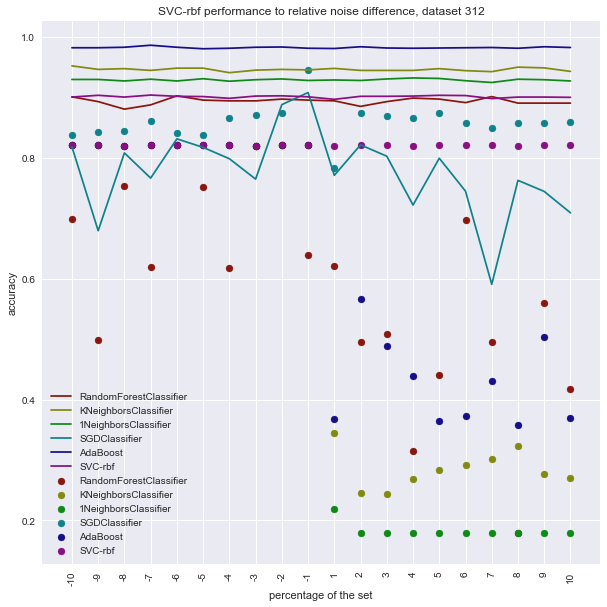

In [30]:
x_axis = range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title(clfName +   ' performance to relative noise difference, dataset ' + str(did))
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score2[i], label = clfNames[i],color = cl[i])
    _=ax.plot(x_axis, score3[i],label = clfNames[i],color = cl[i])
    _=ax.scatter(x_axis, score4[i],label = clfNames[i],color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('accuracy')
_=plt.xlabel('percentage of the set')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [145]:
from LocalDatasets import read_did,read_did_cat
from Noise2 import random_test_set7,add_noise_features2,shuffle_features
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
did = 182
X,y = read_did(did)
cat = read_did_cat(did)
scaler = SelectPercentile()
_=scaler.fit(X[1000:],y[1000:])
X_train_scaled = scaler.transform(X[1000:])
X_test_scaled = scaler.transform(X[:1000])
glu = RandomForestClassifier()
_=glu.fit(X[1000:],y[1000:])
glu.score(X[:1000],y[:1000])
gluk = RandomForestClassifier()
_=gluk.fit(X_train_scaled,y[1000:])
gluk.score(X_test_scaled,y[:1000])
added_X = add_noise_features2(X[1000:],cat,50)
added_X = shuffle_features(added_X)
test_X = add_noise_features2(X[:1000],cat,50)
test_X =shuffle_features(test_X)
gluk = RandomForestClassifier()
_=gluk.fit(added_X,y[1000:])
gluk.score(test_X,y[:1000])
scaler = SelectPercentile()
_=scaler.fit(added_X,y[1000:])
added_X2 = scaler.transform(added_X)
test_X2 = scaler.transform(test_X)
gluz = RandomForestClassifier()
_=gluk.fit(added_X2,y[1000:])
gluk.score(test_X2,y[:1000])


0.89100000000000001

0.82699999999999996

0.375

0.51200000000000001

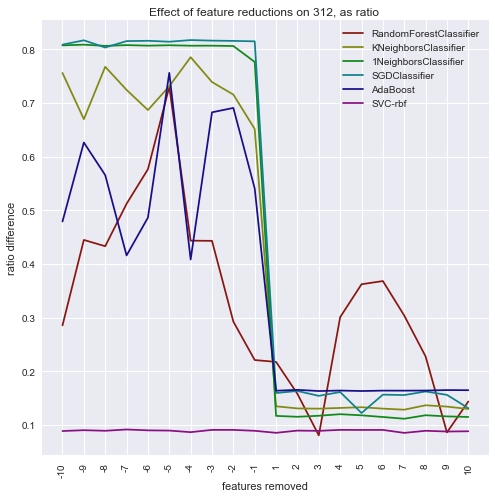

In [32]:
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf', 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
# from LocalDatasets import readDict,read_features,readDict
# did = 16
# func = 'cvScoreFeatures1'
# if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
#     legend_X = range(1,readDict(did)['NumberOfFeatures'])
# else:
#     legend_X = range(0,readDict(did)['NumberOfFeatures'])

# # clfName = 'MultinomialNB'
# amount = 1
# scores = []
features = readDict(did)['NumberOfFeatures']
# for amount in range(1,features-1):
#     scores.append([])    
#     for clfName in clfNames:
#         scores[amount-1].append(read_features(func,clfName,did,amount))

ratio = []
for i in clfNames:
#     score1.append([])
#     score2.append([])
    ratio.append([])
MaxClass = []
j = 0
for amount in range(0,len(amountList)):
    cl = 0
    for clfName in clfNames:
#         score1[cl].append(scores[amount-1][cl][0])
#         score2[cl].append(scores[amount-1][cl][1])
        if not score1[cl][amount] == 0:
            ratio[cl].append((score1[cl][amount]-score2[cl][amount])/score1[cl][amount])
        else:
            ratio[cl].append(0)
        cl = cl + 1

x_axis = range(0,len(ratio[0]))
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(' feature increase on ' + str(did))
else:
    _=plt.title('Effect of feature reductions on ' + str(did) + ', as ratio ')
cl = sns.hls_palette(len(ratio), l=.3, s=.8)
for i in range(0,len(ratio)):
    _= ax.plot(x_axis,ratio[i], label = clfNames[i], color = cl[i] )

#amountList = range(1,features-1)
_=plt.xticks(x_axis,amountList ,rotation='vertical')
fig.set_figheight(8)
fig.set_figwidth(8)
_=plt.ylabel('ratio difference')
_=plt.xlabel('features removed')
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [34]:
from LocalDatasets import read_did,read_did_cat
read_did_cat(312)
X,y = read_did(312)
readDict(312)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


{'MajorityClassSize': 1976,
 'MaxNominalAttDistinctValues': 2,
 'MinorityClassSize': 431,
 'NumberOfClasses': 2,
 'NumberOfFeatures': 300,
 'NumberOfInstances': 2407,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 294,
 'NumberOfSymbolicFeatures': 6,
 'did': 312,
 'format': 'ARFF',
 'name': 'scene',
 'status': 'active'}

In [35]:
X[0]

[0.646467,
 0.666435,
 0.685047,
 0.699053,
 0.652746,
 0.407864,
 0.150309,
 0.535193,
 0.555689,
 0.580782,
 0.577094,
 0.390455,
 0.242458,
 0.170217,
 0.421797,
 0.428206,
 0.428277,
 0.490017,
 0.459252,
 0.350897,
 0.255987,
 0.310109,
 0.375018,
 0.437369,
 0.451752,
 0.508325,
 0.467347,
 0.567068,
 0.546262,
 0.566969,
 0.612951,
 0.621101,
 0.653561,
 0.694546,
 0.574777,
 0.710196,
 0.61451,
 0.59045,
 0.508313,
 0.645884,
 0.800611,
 0.741071,
 0.607308,
 0.589019,
 0.659741,
 0.692727,
 0.796168,
 0.831285,
 0.842202,
 0.000188,
 8.3e-05,
 0.000205,
 0.000122,
 0.196997,
 0.810969,
 0.501902,
 0.177714,
 0.19772,
 0.190142,
 0.174353,
 0.298569,
 0.40135,
 0.378798,
 0.021573,
 0.057354,
 0.102771,
 0.135952,
 0.217168,
 0.327473,
 0.293914,
 0.131084,
 0.131504,
 0.09734,
 0.094081,
 0.141316,
 0.389289,
 0.309297,
 0.052807,
 0.127081,
 0.118791,
 0.22216,
 0.236605,
 0.181267,
 0.460236,
 0.081963,
 0.427434,
 0.427158,
 0.705878,
 0.46066,
 0.104982,
 0.238395,
 0.4009

In [39]:
3 % 2

1

In [40]:
2.3 % 1

0.2999999999999998

In [41]:
3 % 1

0

In [42]:
2.30 % 1

0.2999999999999998

In [31]:
score4

[[0.6991666666668002,
  0.4987499999999,
  0.7529166666667,
  0.6187500000000001,
  0.8208333333333,
  0.7525000000001001,
  0.6183333333333,
  0.8204166666666,
  0.8208333333333,
  0.6391666666667001,
  0.6212499999998999,
  0.4954166666667,
  0.5083333333332,
  0.3154166666667001,
  0.44083333333350005,
  0.6970833333333,
  0.495,
  0.17958333333339999,
  0.5591666666666,
  0.4166666666666],
 [0.8208333333336,
  0.8220833333333,
  0.8204166666667,
  0.82125,
  0.8208333333333,
  0.8208333333335001,
  0.8208333333333,
  0.8204166666666,
  0.8208333333333,
  0.8208333333333,
  0.34500000000000003,
  0.24499999999990002,
  0.2437500000001,
  0.26875,
  0.28333333333340005,
  0.29083333333350003,
  0.3008333333334,
  0.32333333333330005,
  0.2775000000001,
  0.26999999999999996],
 [0.8208333333336,
  0.8220833333333,
  0.8204166666667,
  0.82125,
  0.8208333333333,
  0.8208333333335001,
  0.8208333333333,
  0.8204166666666,
  0.8208333333333,
  0.8208333333333,
  0.21916666666659998,
  0